In [13]:
import matplotlib.pyplot as plt
import numpy as np

# number of data
N=4000
# size of each sample
L=2
# box size
B=100

!mkdir DATA

mkdir: cannot create directory ‘DATA’: File exists


2 5 1


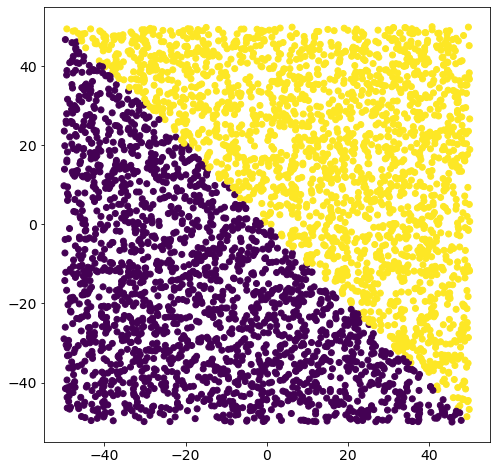

In [14]:
%run nonlinear_function.py

TYPE=3

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")

In [15]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
plt.rcParams['font.size']=14

%run nonlinear_function.py

#training data 
perc_train=0.8

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 1.0
[24.89066375 15.35698709] 1.0
[24.77148093 46.13067361] 1.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 1.0
[46.46475974 22.36853469] 1.0
[14.24753279 21.74536208] 1.0
data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

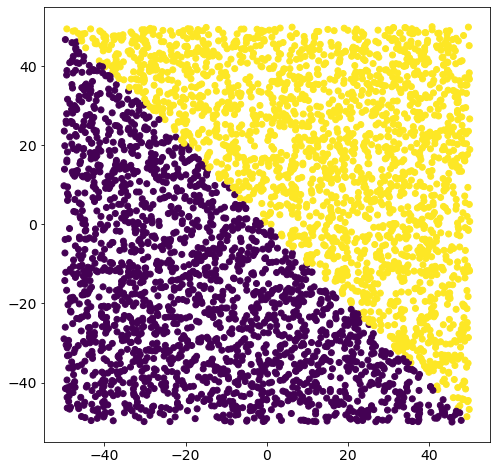

In [16]:
#keras work with numpy arrays: just use them from the start
TYPE=3
x= np.loadtxt(filename("data",TYPE), delimiter=' ')
y= np.loadtxt(filename("labels",TYPE), delimiter=' ')
N= len(x)

# dim. of a sample
L=len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])
    
N_train= int(perc_train*N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize =(8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

In [17]:
(x_train, y_train)=(x[0:N_train],y[0:N_train])
(x_valid, y_valid)=(x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [18]:
def Rescale(x):
    return (x-x.mean())/np.sqrt(x.var())
    #return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)
print(x_train)

[[-1.09854886 -1.02696928]
 [ 0.23239757  0.32886942]
 [ 1.60836682  0.52872451]
 ...
 [-1.71033821 -0.58010476]
 [ 0.45209286 -0.58910521]
 [ 1.55988736  0.94632066]]


In [19]:
#reproducibility
np.random.seed(12345)

CASE=1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(3,activation='sigmoid'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 20)                60        
                                                                 
 dense_6 (Dense)             (None, 20)                420       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
model.compile(loss='binary_crossentropy',
             #optimizer='RMSprop'
             optimizer='adam',
             metrics=['accuracy'])

In [21]:
fit = model.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/400
64/64 - 1s - loss: 0.5791 - accuracy: 0.8000 - val_loss: 0.5210 - val_accuracy: 0.8213 - 666ms/epoch - 10ms/step
Epoch 2/400
64/64 - 0s - loss: 0.4821 - accuracy: 0.8475 - val_loss: 0.4413 - val_accuracy: 0.8675 - 124ms/epoch - 2ms/step
Epoch 3/400
64/64 - 0s - loss: 0.4073 - accuracy: 0.8913 - val_loss: 0.3662 - val_accuracy: 0.9137 - 116ms/epoch - 2ms/step
Epoch 4/400
64/64 - 0s - loss: 0.3246 - accuracy: 0.9344 - val_loss: 0.2725 - val_accuracy: 0.9588 - 145ms/epoch - 2ms/step
Epoch 5/400
64/64 - 0s - loss: 0.2306 - accuracy: 0.9678 - val_loss: 0.1795 - val_accuracy: 0.9762 - 118ms/epoch - 2ms/step
Epoch 6/400
64/64 - 0s - loss: 0.1519 - accuracy: 0.9834 - val_loss: 0.1168 - val_accuracy: 0.9850 - 117ms/epoch - 2ms/step
Epoch 7/400
64/64 - 0s - loss: 0.1091 - accuracy: 0.9825 - val_loss: 0.0805 - val_accuracy: 0.9862 - 137ms/epoch - 2ms/step
Epoch 8/400
64/64 - 0s - loss: 0.0795 - accuracy: 0.9866 - val_loss: 0.0609 - val_accuracy: 0.9900 - 120ms/epoch - 2ms/step
Epoch 9

Epoch 67/400
64/64 - 0s - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.0305 - val_accuracy: 0.9887 - 119ms/epoch - 2ms/step
Epoch 68/400
64/64 - 0s - loss: 0.0093 - accuracy: 0.9972 - val_loss: 0.0286 - val_accuracy: 0.9875 - 116ms/epoch - 2ms/step
Epoch 69/400
64/64 - 0s - loss: 0.0086 - accuracy: 0.9987 - val_loss: 0.0352 - val_accuracy: 0.9837 - 111ms/epoch - 2ms/step
Epoch 70/400
64/64 - 0s - loss: 0.0096 - accuracy: 0.9962 - val_loss: 0.0286 - val_accuracy: 0.9900 - 118ms/epoch - 2ms/step
Epoch 71/400
64/64 - 0s - loss: 0.0092 - accuracy: 0.9978 - val_loss: 0.0252 - val_accuracy: 0.9887 - 118ms/epoch - 2ms/step
Epoch 72/400
64/64 - 0s - loss: 0.0099 - accuracy: 0.9962 - val_loss: 0.0351 - val_accuracy: 0.9850 - 117ms/epoch - 2ms/step
Epoch 73/400
64/64 - 0s - loss: 0.0089 - accuracy: 0.9981 - val_loss: 0.0262 - val_accuracy: 0.9900 - 119ms/epoch - 2ms/step
Epoch 74/400
64/64 - 0s - loss: 0.0086 - accuracy: 0.9975 - val_loss: 0.0267 - val_accuracy: 0.9900 - 112ms/epoch - 2ms/step


Epoch 133/400
64/64 - 0s - loss: 0.0056 - accuracy: 0.9981 - val_loss: 0.0382 - val_accuracy: 0.9900 - 122ms/epoch - 2ms/step
Epoch 134/400
64/64 - 0s - loss: 0.0053 - accuracy: 0.9987 - val_loss: 0.0348 - val_accuracy: 0.9900 - 118ms/epoch - 2ms/step
Epoch 135/400
64/64 - 0s - loss: 0.0056 - accuracy: 0.9981 - val_loss: 0.0423 - val_accuracy: 0.9900 - 119ms/epoch - 2ms/step
Epoch 136/400
64/64 - 0s - loss: 0.0052 - accuracy: 0.9981 - val_loss: 0.0495 - val_accuracy: 0.9862 - 119ms/epoch - 2ms/step
Epoch 137/400
64/64 - 0s - loss: 0.0057 - accuracy: 0.9975 - val_loss: 0.0398 - val_accuracy: 0.9900 - 118ms/epoch - 2ms/step
Epoch 138/400
64/64 - 0s - loss: 0.0074 - accuracy: 0.9966 - val_loss: 0.0555 - val_accuracy: 0.9850 - 115ms/epoch - 2ms/step
Epoch 139/400
64/64 - 0s - loss: 0.0051 - accuracy: 0.9987 - val_loss: 0.0486 - val_accuracy: 0.9862 - 118ms/epoch - 2ms/step
Epoch 140/400
64/64 - 0s - loss: 0.0061 - accuracy: 0.9981 - val_loss: 0.0539 - val_accuracy: 0.9850 - 119ms/epoch - 2

64/64 - 0s - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0484 - val_accuracy: 0.9900 - 120ms/epoch - 2ms/step
Epoch 199/400
64/64 - 0s - loss: 0.0057 - accuracy: 0.9981 - val_loss: 0.0451 - val_accuracy: 0.9887 - 121ms/epoch - 2ms/step
Epoch 200/400
64/64 - 0s - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.0470 - val_accuracy: 0.9887 - 117ms/epoch - 2ms/step
Epoch 201/400
64/64 - 0s - loss: 0.0055 - accuracy: 0.9981 - val_loss: 0.0488 - val_accuracy: 0.9900 - 119ms/epoch - 2ms/step
Epoch 202/400
64/64 - 0s - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0771 - val_accuracy: 0.9862 - 121ms/epoch - 2ms/step
Epoch 203/400
64/64 - 0s - loss: 0.0057 - accuracy: 0.9978 - val_loss: 0.0611 - val_accuracy: 0.9887 - 120ms/epoch - 2ms/step
Epoch 204/400
64/64 - 0s - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.0767 - val_accuracy: 0.9837 - 121ms/epoch - 2ms/step
Epoch 205/400
64/64 - 0s - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.0534 - val_accuracy: 0.9900 - 112ms/epoch - 2ms/step
Epoch 

Epoch 264/400
64/64 - 0s - loss: 0.0057 - accuracy: 0.9972 - val_loss: 0.0629 - val_accuracy: 0.9887 - 119ms/epoch - 2ms/step
Epoch 265/400
64/64 - 0s - loss: 0.0034 - accuracy: 0.9987 - val_loss: 0.0733 - val_accuracy: 0.9850 - 115ms/epoch - 2ms/step
Epoch 266/400
64/64 - 0s - loss: 0.0048 - accuracy: 0.9981 - val_loss: 0.0601 - val_accuracy: 0.9887 - 114ms/epoch - 2ms/step
Epoch 267/400
64/64 - 0s - loss: 0.0066 - accuracy: 0.9972 - val_loss: 0.0741 - val_accuracy: 0.9837 - 120ms/epoch - 2ms/step
Epoch 268/400
64/64 - 0s - loss: 0.0039 - accuracy: 0.9981 - val_loss: 0.0729 - val_accuracy: 0.9850 - 120ms/epoch - 2ms/step
Epoch 269/400
64/64 - 0s - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.0655 - val_accuracy: 0.9862 - 118ms/epoch - 2ms/step
Epoch 270/400
64/64 - 0s - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0562 - val_accuracy: 0.9900 - 117ms/epoch - 2ms/step
Epoch 271/400
64/64 - 0s - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0706 - val_accuracy: 0.9850 - 119ms/epoch - 2

64/64 - 0s - loss: 0.0033 - accuracy: 0.9987 - val_loss: 0.0657 - val_accuracy: 0.9875 - 118ms/epoch - 2ms/step
Epoch 330/400
64/64 - 0s - loss: 0.0048 - accuracy: 0.9981 - val_loss: 0.0592 - val_accuracy: 0.9900 - 118ms/epoch - 2ms/step
Epoch 331/400
64/64 - 0s - loss: 0.0043 - accuracy: 0.9984 - val_loss: 0.0728 - val_accuracy: 0.9900 - 123ms/epoch - 2ms/step
Epoch 332/400
64/64 - 0s - loss: 0.0036 - accuracy: 0.9978 - val_loss: 0.0791 - val_accuracy: 0.9862 - 120ms/epoch - 2ms/step
Epoch 333/400
64/64 - 0s - loss: 0.0043 - accuracy: 0.9984 - val_loss: 0.0758 - val_accuracy: 0.9875 - 116ms/epoch - 2ms/step
Epoch 334/400
64/64 - 0s - loss: 0.0073 - accuracy: 0.9959 - val_loss: 0.0715 - val_accuracy: 0.9887 - 121ms/epoch - 2ms/step
Epoch 335/400
64/64 - 0s - loss: 0.0057 - accuracy: 0.9984 - val_loss: 0.0604 - val_accuracy: 0.9875 - 120ms/epoch - 2ms/step
Epoch 336/400
64/64 - 0s - loss: 0.0067 - accuracy: 0.9966 - val_loss: 0.0540 - val_accuracy: 0.9900 - 118ms/epoch - 2ms/step
Epoch 

Epoch 395/400
64/64 - 0s - loss: 0.0056 - accuracy: 0.9981 - val_loss: 0.0830 - val_accuracy: 0.9887 - 120ms/epoch - 2ms/step
Epoch 396/400
64/64 - 0s - loss: 0.0048 - accuracy: 0.9981 - val_loss: 0.0684 - val_accuracy: 0.9887 - 119ms/epoch - 2ms/step
Epoch 397/400
64/64 - 0s - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0734 - val_accuracy: 0.9862 - 123ms/epoch - 2ms/step
Epoch 398/400
64/64 - 0s - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0714 - val_accuracy: 0.9875 - 118ms/epoch - 2ms/step
Epoch 399/400
64/64 - 0s - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0829 - val_accuracy: 0.9875 - 113ms/epoch - 2ms/step
Epoch 400/400
64/64 - 0s - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.0654 - val_accuracy: 0.9900 - 119ms/epoch - 2ms/step


[0.0052587296813726425, 0.06540397554636002]


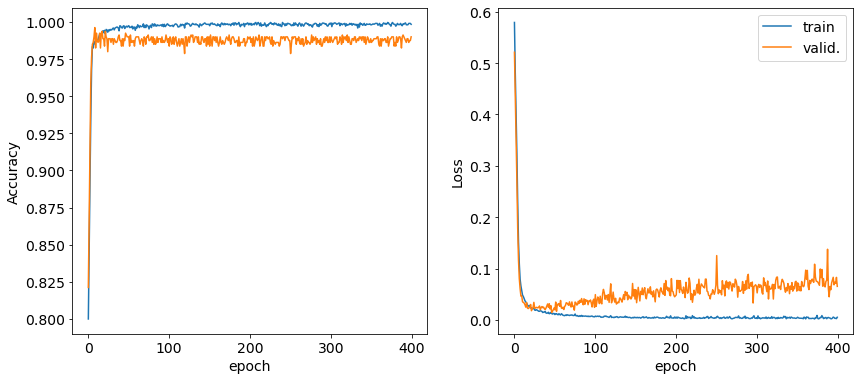

In [22]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
a=[]
a.append(fit.history['loss'][-1])
a.append(fit.history['val_loss'][-1])
print(a)
plt.savefig('LC-L-I.png')

In [23]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/(50/x_train[:,1].max())
print(grid_r)
pred = model.predict(grid_r)

51 2601
[50. 50.]
[[-1.73132788 -1.73132788]
 [-1.66207477 -1.73132788]
 [-1.59282165 -1.73132788]
 ...
 [ 1.59282165  1.73132788]
 [ 1.66207477  1.73132788]
 [ 1.73132788  1.73132788]]


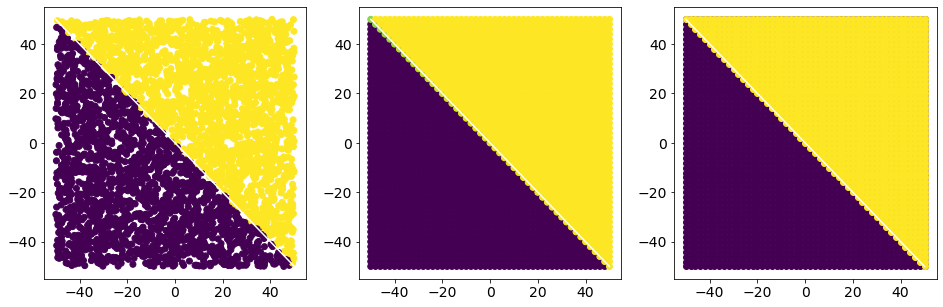

In [24]:
def boundaries():    
    #ax.plot((-20,-20),(-40,50),c="w")
    #ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-50,50),(50,-50),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.show
plt.savefig('L-I.png')